In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.3


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/priya/Downloads/sp/dataset/train/'
valid_path = 'C:/Users/priya/Downloads/sp/dataset/test/'

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
folders = glob('C:/Users/priya/Downloads/sp/dataset/test/*')

In [8]:
folders

['C:/Users/priya/Downloads/sp/dataset/test\\aloperia areata',
 'C:/Users/priya/Downloads/sp/dataset/test\\beau_s lines',
 'C:/Users/priya/Downloads/sp/dataset/test\\bluish nail',
 'C:/Users/priya/Downloads/sp/dataset/test\\clubbing',
 'C:/Users/priya/Downloads/sp/dataset/test\\Darier_s disease',
 'C:/Users/priya/Downloads/sp/dataset/test\\eczema',
 'C:/Users/priya/Downloads/sp/dataset/test\\half and half nailes (Lindsay_s nails)',
 'C:/Users/priya/Downloads/sp/dataset/test\\koilonychia',
 'C:/Users/priya/Downloads/sp/dataset/test\\leukonychia',
 'C:/Users/priya/Downloads/sp/dataset/test\\Muehrck-e_s lines',
 'C:/Users/priya/Downloads/sp/dataset/test\\onycholycis',
 'C:/Users/priya/Downloads/sp/dataset/test\\pale nail',
 'C:/Users/priya/Downloads/sp/dataset/test\\red lunula',
 'C:/Users/priya/Downloads/sp/dataset/test\\splinter hemmorrage',
 'C:/Users/priya/Downloads/sp/dataset/test\\terry_s nail',
 'C:/Users/priya/Downloads/sp/dataset/test\\white nail',
 'C:/Users/priya/Downloads/sp/da

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
len(folders)

17

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/priya/Downloads/sp/dataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 647 images belonging to 17 classes.


In [16]:
test_set = test_datagen.flow_from_directory('C:/Users/priya/Downloads/sp/dataset/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 183 images belonging to 17 classes.


In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
21/21 [==============================] - 157s 7s/step - loss: 3.3151 - accuracy: 0.1206 - val_loss: 2.8515 - val_accuracy: 0.1858
Epoch 2/20
21/21 [==============================] - 154s 7s/step - loss: 2.4316 - accuracy: 0.2937 - val_loss: 2.6614 - val_accuracy: 0.2732
Epoch 3/20
21/21 [==============================] - 154s 7s/step - loss: 2.1747 - accuracy: 0.3694 - val_loss: 1.9810 - val_accuracy: 0.4372
Epoch 4/20
21/21 [==============================] - 158s 8s/step - loss: 1.8204 - accuracy: 0.4606 - val_loss: 1.7579 - val_accuracy: 0.5246
Epoch 5/20
21/21 [==============================] - 156s 7s/step - loss: 1.6469 - accuracy: 0.5224 - val_loss: 1.9427 - val_accuracy: 0.5246
Epoch 6/20
21/21 [==============================] - 155s 7s/step - loss: 1.5509 - accuracy: 0.5255 - val_loss: 1.5837 - val_accuracy: 0.5628
Epoch 7/20
21/21 [==============================] - 156s 7s/step - loss: 1.3683 - accuracy: 0.6136 - val_loss: 1.2285 - val_accuracy: 0.6503
Epoch 8/20
21

In [18]:
import matplotlib.pyplot as plt

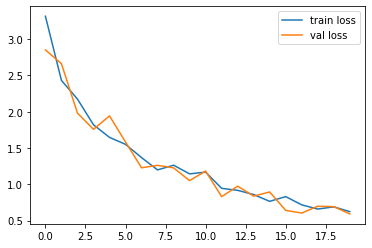

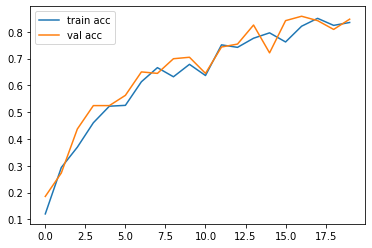

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[6.6189730e-01, 1.6664448e-05, 2.5189862e-01, ..., 1.4588851e-03,
        5.8642076e-04, 3.6591666e-03],
       [4.8808361e-04, 4.8001832e-03, 3.6315534e-03, ..., 2.1883738e-03,
        9.0916321e-04, 1.3407074e-01],
       [9.9780041e-01, 5.9135527e-07, 1.2208801e-03, ..., 1.8037733e-06,
        1.6277336e-05, 2.6466978e-05],
       ...,
       [4.7013302e-05, 6.4014841e-04, 1.9989410e-04, ..., 4.1835043e-03,
        2.5566735e-05, 6.5883104e-04],
       [1.5987736e-05, 1.9673309e-04, 3.3925149e-05, ..., 5.5319769e-03,
        3.1822561e-05, 1.5270672e-03],
       [9.2746429e-03, 7.8425571e-02, 2.4750492e-01, ..., 2.8741615e-02,
        2.4073634e-02, 6.0559227e-03]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([ 0,  6,  0,  2,  4,  1,  5,  3,  4, 14,  7, 15,  2, 12,  5, 10,  7,
        7,  7, 14,  9,  0, 14,  5, 11, 12,  1,  3,  3,  9,  5,  0,  5, 14,
        6, 16,  5,  6, 16, 14,  2,  6,  7,  5,  1, 12, 13, 10, 13,  9,  0,
       12,  1,  7, 11,  0,  0,  5,  3, 13,  2,  3,  0, 12, 16, 13,  6,  9,
       11,  6,  8,  5,  5, 14,  6,  6,  2, 13,  3, 14, 11, 11, 12,  1,  9,
       12,  2,  7,  0,  8,  4, 12, 14, 12, 14,  5, 10,  0,  8,  5, 11,  3,
        0, 14, 14, 16,  2,  3, 13,  7, 14, 14, 12,  3, 14, 14, 11,  8, 16,
        5,  2, 10, 15, 14,  0,  8,  5,  2, 12, 14, 15, 11,  1,  4,  0, 16,
        5,  4,  4,  0, 13,  2, 13,  2,  1,  0,  1,  6,  1, 12, 12, 15,  6,
        3, 14, 10, 14,  2,  2,  3,  0, 15,  1,  6,  9,  2, 16, 14, 14, 13,
       16, 14,  8,  7,  2,  5,  5,  2,  7,  8,  5,  5,  5], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

In [26]:
model=load_model('model_vgg16.h5')

In [27]:
img_data='C:/Users/priya/Downloads/image1.jpg'

In [28]:
img_data

'C:/Users/priya/Downloads/image1.jpg'

In [29]:
img=image.load_img('C:/Users/priya/Downloads/image1.jpg',target_size=(224,224))

In [30]:
x=image.img_to_array(img)
x

array([[[209., 176., 167.],
        [211., 178., 169.],
        [217., 184., 175.],
        ...,
        [221., 187., 175.],
        [211., 177., 168.],
        [221., 187., 178.]],

       [[208., 175., 166.],
        [216., 183., 174.],
        [215., 182., 173.],
        ...,
        [228., 194., 182.],
        [205., 171., 161.],
        [219., 185., 175.]],

       [[216., 183., 174.],
        [214., 181., 172.],
        [219., 186., 177.],
        ...,
        [220., 186., 174.],
        [220., 187., 172.],
        [204., 171., 156.]],

       ...,

       [[107.,  88.,  73.],
        [108.,  89.,  74.],
        [108.,  89.,  74.],
        ...,
        [136., 103.,  84.],
        [132., 101.,  80.],
        [133., 102.,  81.]],

       [[ 95.,  78.,  60.],
        [ 91.,  74.,  56.],
        [102.,  85.,  67.],
        ...,
        [134., 107.,  86.],
        [133., 106.,  85.],
        [128., 101.,  80.]],

       [[104.,  87.,  69.],
        [ 97.,  80.,  62.],
        [ 95.,  

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [34]:
import numpy as np
import tensorflow as tf
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[0.00355513, 0.03540291, 0.00512659, 0.24942361, 0.01244339,
        0.05310192, 0.03255669, 0.00370206, 0.01645713, 0.03865835,
        0.00175602, 0.00449847, 0.01702134, 0.0152582 , 0.49230406,
        0.01020741, 0.00852678]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:
a==1

array([False])

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.5.3'